- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


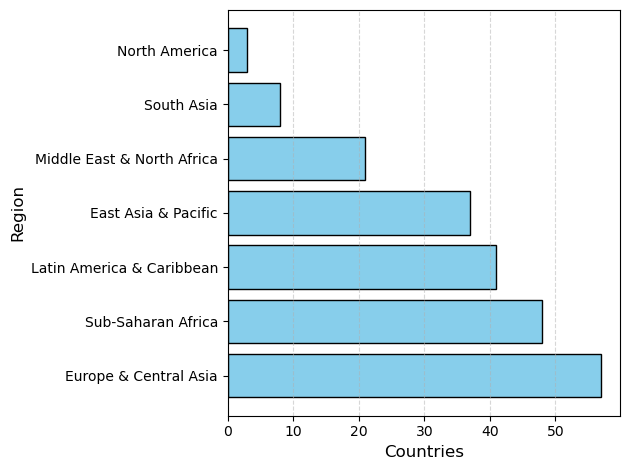

In [3]:
# Vẽ barplot cho các Region
#TODO
region_counts = world_df['Region'].value_counts()
plt.barh(region_counts.index, region_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

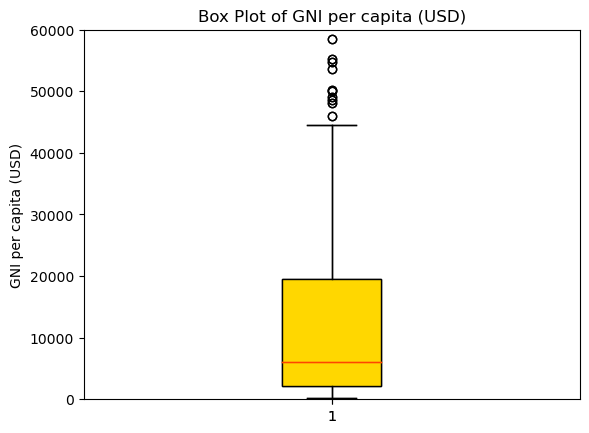

In [4]:
# Vẽ boxplot cho 'GNI per capita (USD)'
#TODO
plt.boxplot(world_df['GNI per capita (USD)'].dropna(), vert=True, widths=0.2, patch_artist=True)
plt.ylabel('GNI per capita (USD)')
plt.title('Box Plot of GNI per capita (USD)')
box_colors = ['#FFD700']
median_color = '#FF4500' 
plt.boxplot(world_df['GNI per capita (USD)'].dropna(), vert=True, widths=0.2, patch_artist=True,
            boxprops={'facecolor': box_colors[0]}, medianprops={'color': median_color})
plt.ylim(0, 60000)
plt.show()

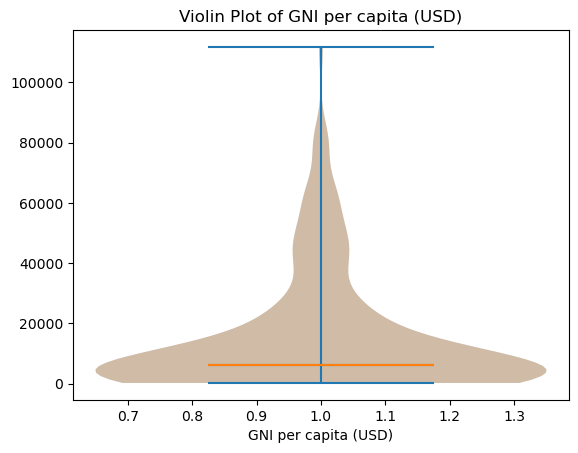

In [5]:
# Vẽ violinplot cho 'GNI per capita (USD)'
# TODO
plt.violinplot(world_df['GNI per capita (USD)'].dropna(), vert=True, widths=0.7, showmedians=True)
plt.xlabel('GNI per capita (USD)')
plt.ylabel('')
plt.title('Violin Plot of GNI per capita (USD)')
violin_colors = ['#FFD700']  
median_color = '#FF4500'  
plt.violinplot(world_df['GNI per capita (USD)'].dropna(), vert=True, widths=0.7, showmedians=True,showmeans=False, showextrema=False,)
plt.show()

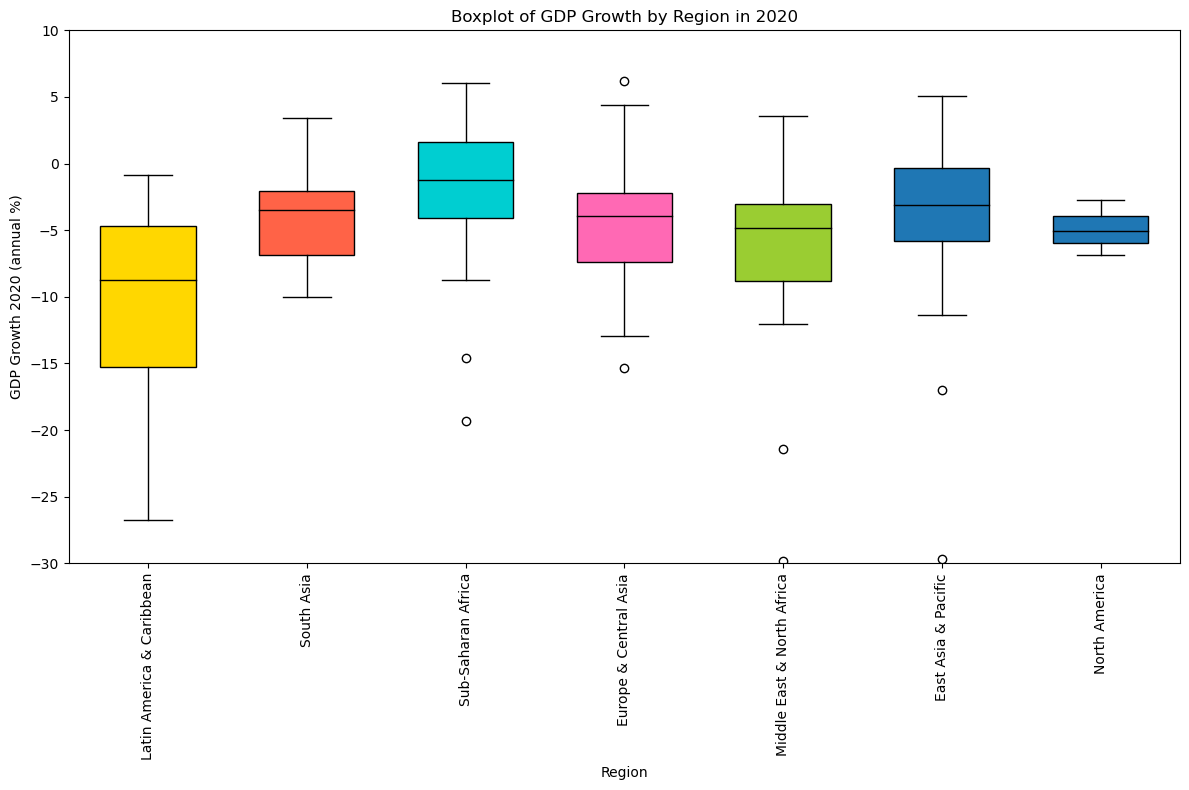

In [6]:
# Vẽ boxplot của các Region bằng GDP growth 2020 (annual %) lên cùng một biểu đồ
# TODO
gdp_growth = world_df['GDP growth (annual %)'].dropna()
regions = world_df['Region'].dropna()
common_indices = gdp_growth.index.intersection(regions.index)
gdp_growth = gdp_growth.loc[common_indices]
regions = regions.loc[common_indices]

# Group data by region
unique_regions = regions.unique()
data_by_region = [gdp_growth[regions == region] for region in unique_regions]

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Customize the boxplot
boxplot = ax.boxplot(data_by_region, labels=unique_regions, vert=True, widths=0.6, patch_artist=True)
ax.set_ylim(-30, 10)  # Reverse y-axis limits
ax.tick_params(axis='x', rotation=90)

# Customize the colors of the boxplot elements
box_colors = ['#FFD700', '#FF6347', '#00CED1', '#FF69B4', '#9ACD32']
median_color = 'black'
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)
for median in boxplot['medians']:
    median.set_color(median_color)

# Set labels and title
ax.set_ylabel('GDP Growth 2020 (annual %)')
ax.set_xlabel('Region')
ax.set_title('Boxplot of GDP Growth by Region in 2020')

# Display the plot
plt.tight_layout()
plt.show()

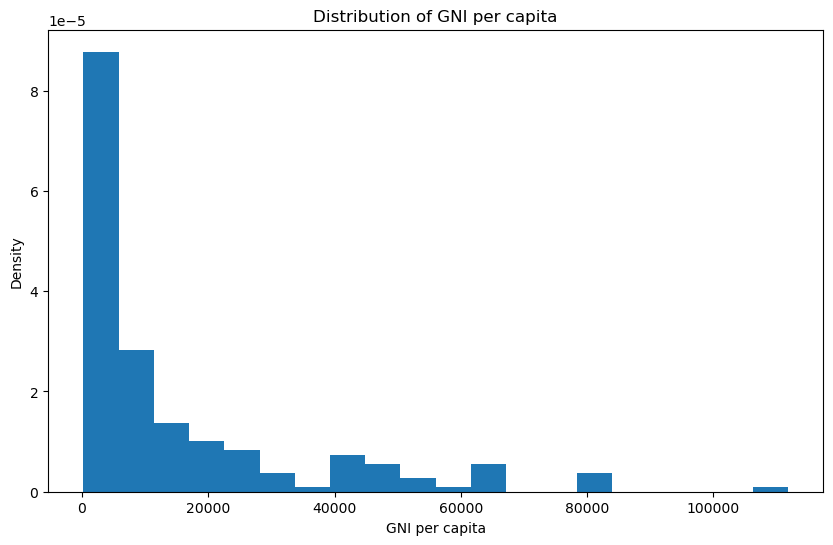

In [7]:
# Vẽ histogram của 'GNI per capita (USD)'
# TODO
gni_per_capita = world_df['GNI per capita (USD)'].dropna()
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(gni_per_capita, bins=20, density=True)
ax.set_xlabel('GNI per capita')
ax.set_ylabel('Density')
ax.set_title('Distribution of GNI per capita')
plt.show()

Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

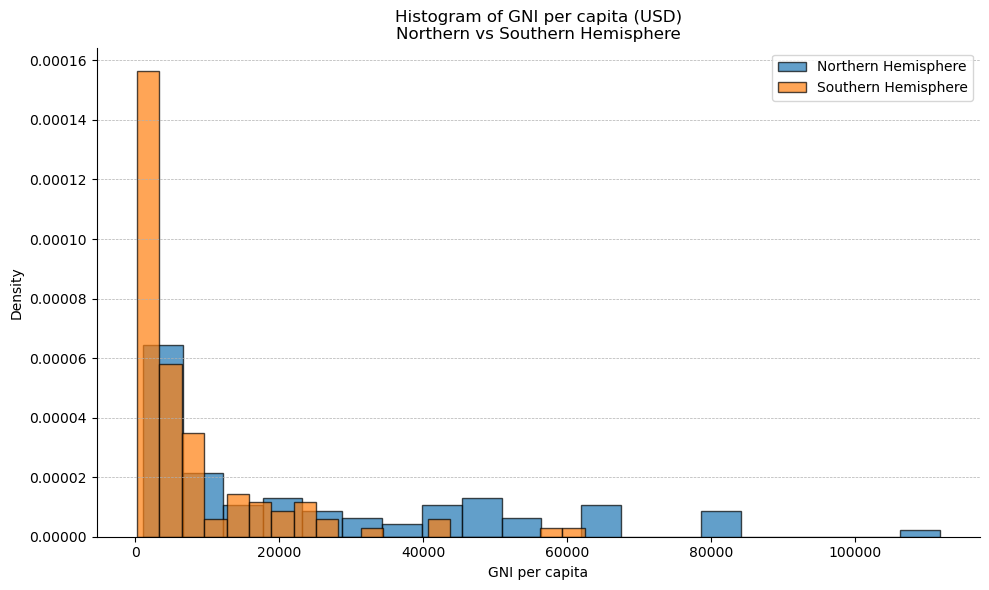

In [8]:

northern_df = world_df[world_df['Region'].isin(['Europe & Central Asia', 'North America', 'East Asia & Pacific'])]
southern_df = world_df[world_df['Region'].isin(['Sub-Saharan Africa', 'Middle East & North Africa', 'South Asia', 'Latin America & Caribbean'])]

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(northern_df['GNI per capita (USD)'].dropna(), bins=20, color='#1f77b4', alpha=0.7, label='Northern Hemisphere', density=True, edgecolor='black')
ax.hist(southern_df['GNI per capita (USD)'].dropna(), bins=20, color='#ff7f0e', alpha=0.7, label='Southern Hemisphere', density=True, edgecolor='black')

# Set labels and title
ax.set_xlabel('GNI per capita')
ax.set_ylabel('Density')
ax.set_title('Histogram of GNI per capita (USD)\nNorthern vs Southern Hemisphere')

# Customize grid lines
ax.grid(axis='y', linestyle='--', linewidth=0.5)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

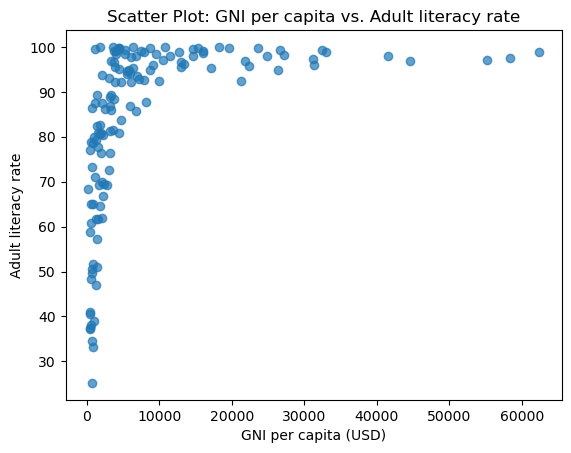

In [9]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'

# TODO
fig, ax = plt.subplots()
gni_per_capita = world_df['GNI per capita (USD)'].dropna()
adult_literacy_rate = world_df['Adult literacy rate'].dropna()
common_indices = gni_per_capita.index.intersection(adult_literacy_rate.index)
gni_per_capita = gni_per_capita.loc[common_indices]
adult_literacy_rate = adult_literacy_rate.loc[common_indices]
ax.scatter(gni_per_capita, adult_literacy_rate, color='#2178b5', alpha=0.7)
ax.set_xlabel('GNI per capita (USD)')
ax.set_ylabel('Adult literacy rate')

# Set the plot title
ax.set_title('Scatter Plot: GNI per capita vs. Adult literacy rate')

# Display the plot
plt.show()

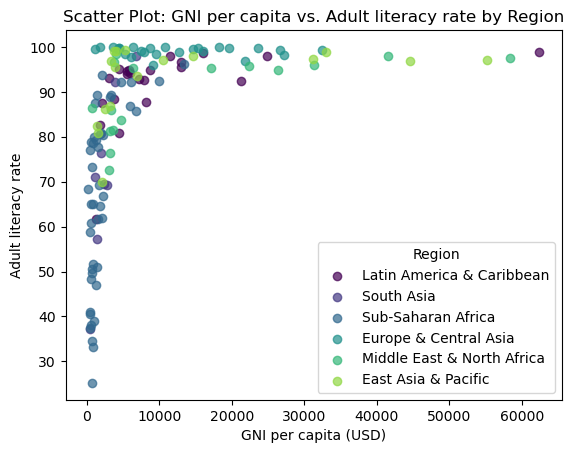

In [10]:
#TODO
fig, ax = plt.subplots()

# Extract the data 
gni_per_capita = world_df['GNI per capita (USD)'].dropna()
adult_literacy_rate = world_df['Adult literacy rate'].dropna()
regions = world_df['Region'].dropna()

# Find the overlapping indices
common_indices = gni_per_capita.index.intersection(adult_literacy_rate.index).intersection(regions.index)

# Extract the overlapping data points
gni_per_capita = gni_per_capita.loc[common_indices]
adult_literacy_rate = adult_literacy_rate.loc[common_indices]
regions = regions.loc[common_indices]

# Create a dictionary to map each unique region to a color
unique_regions = regions.unique()
region_color_map = {region: plt.cm.viridis(i / len(unique_regions)) for i, region in enumerate(unique_regions)}

# Scatter plot with different colors for each region
for region in unique_regions:
    region_mask = (regions == region)
    ax.scatter(gni_per_capita[region_mask], adult_literacy_rate[region_mask], label=region, color=region_color_map[region], alpha=0.7)

# Set label
ax.set_xlabel('GNI per capita (USD)')
ax.set_ylabel('Adult literacy rate')

ax.set_title('Scatter Plot: GNI per capita vs. Adult literacy rate by Region')
ax.legend(title='Region')
plt.show()


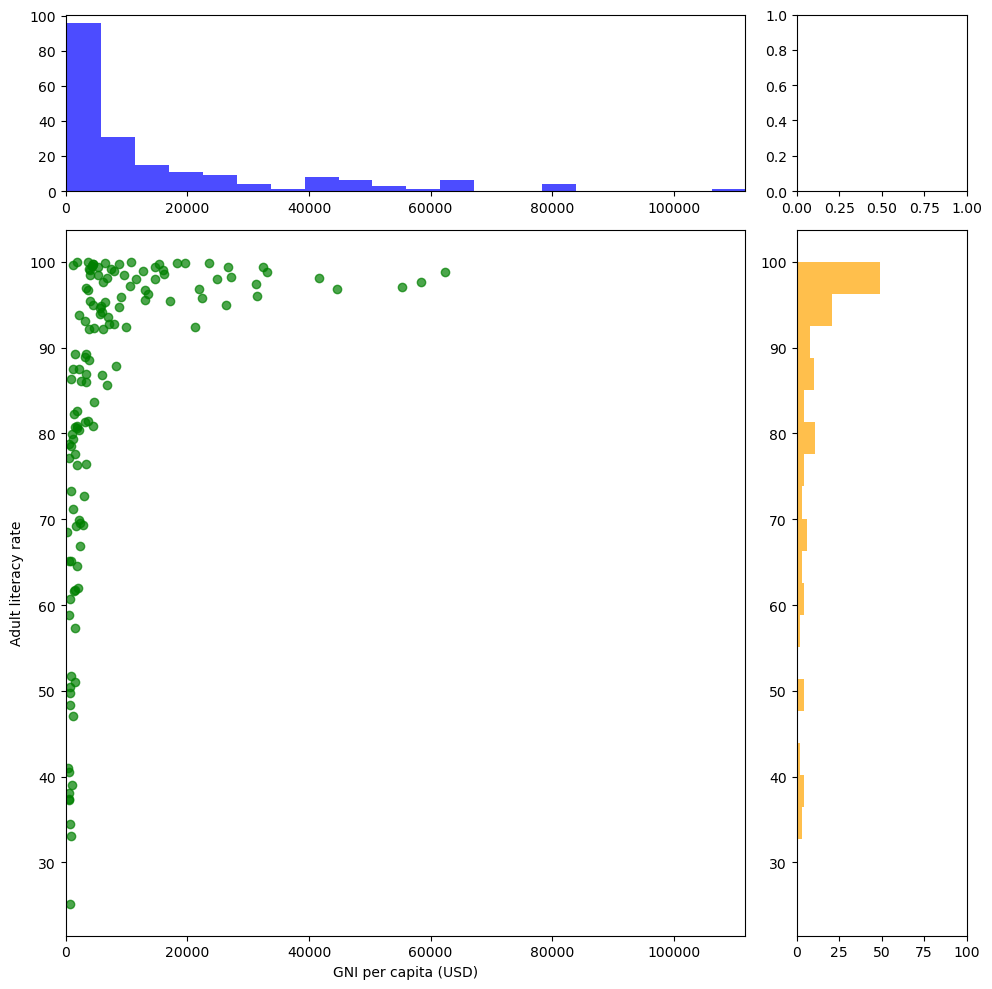

In [11]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục

# TODO
fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [4, 1]})
scatter = axs[1, 0].scatter(world_df['GNI per capita (USD)'], world_df['Adult literacy rate'], c='green', alpha=0.7)
axs[1, 0].set_xlabel('GNI per capita (USD)')
axs[1, 0].set_ylabel('Adult literacy rate')
axs[0, 0].hist(world_df['GNI per capita (USD)'].dropna(), bins=20, color='blue', alpha=0.7)
x_limits = (0, world_df['GNI per capita (USD)'].max())
axs[1, 0].set_xlim(x_limits)
axs[0, 0].set_xlim(x_limits)
axs[1, 1].hist(world_df['Adult literacy rate'].dropna(), bins=20, color='orange', alpha=0.7, orientation='horizontal')
axs[1, 1].set_xlim(0, max(world_df['Adult literacy rate'].dropna()))
plt.tight_layout()
plt.show()

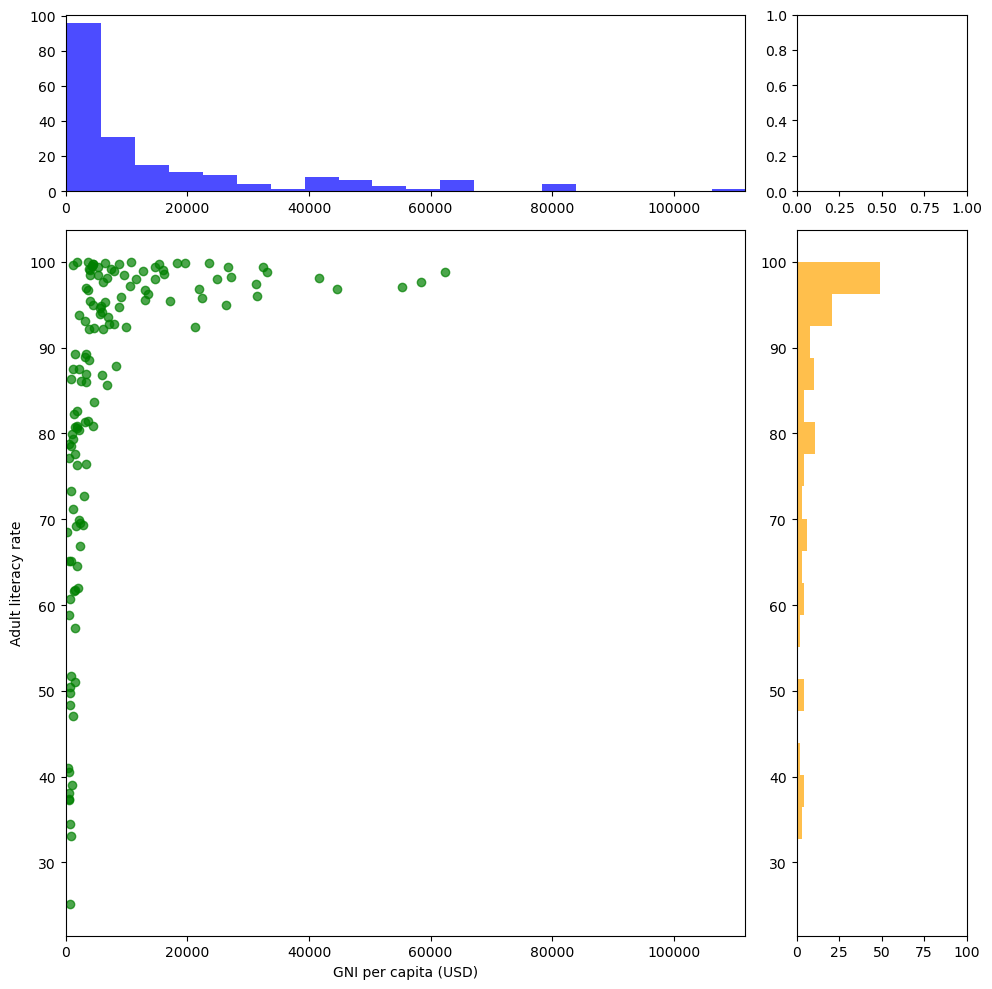

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [4, 1]})
scatter = axs[1, 0].scatter(
    world_df['GNI per capita (USD)'],
    world_df['Adult literacy rate'],
    c='green',
    alpha=0.7
)
axs[1, 0].set(xlabel='GNI per capita (USD)', ylabel='Adult literacy rate')
axs[0, 0].hist(
    world_df['GNI per capita (USD)'].dropna(),
    bins=20,
    color='blue',
    alpha=0.7
)
x_limits = (0, world_df['GNI per capita (USD)'].max())
axs[1, 0].set_xlim(x_limits)
axs[0, 0].set_xlim(x_limits)
axs[1, 1].hist(
    world_df['Adult literacy rate'].dropna(),
    bins=20,
    color='orange',
    alpha=0.7,
    orientation='horizontal'
)
axs[1, 1].set_xlim(0, max(world_df['Adult literacy rate'].dropna()))
plt.tight_layout()
plt.show()
